# 📘 Reaction Kinetics: Rate Constant Determination> Fit first-order kinetic models to concentration data⏱️ **20-30 minutes** | 📊 **Level: ●●○ Intermediate** | 🏷️ **Chemistry**---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/imewei/NLSQ/blob/main/examples/notebooks/04_gallery/chemistry/reaction_kinetics.ipynb)


In [1]:
# @title Install NLSQ (run once in Colab)
import sys

if 'google.colab' in sys.modules:
    print("Running in Google Colab - installing NLSQ...")
    !pip install -q nlsq
    print("✅ NLSQ installed successfully!")
else:
    print("Not running in Colab - assuming NLSQ is already installed")

Not running in Colab - assuming NLSQ is already installed


## 🔬 Domain Background**Model:** $[A]_t = [A]_0 e^{-kt}$ (first-order)**Applications:** Reaction mechanism studies, catalyst evaluation---

## Setup

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
# MUST come before importing matplotlib
%matplotlib inline

In [3]:
from IPython.display import display

In [4]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

from nlsq import curve_fit


def first_order(t, A0, k):
    return A0 * jnp.exp(-k * t)

## Generate Data

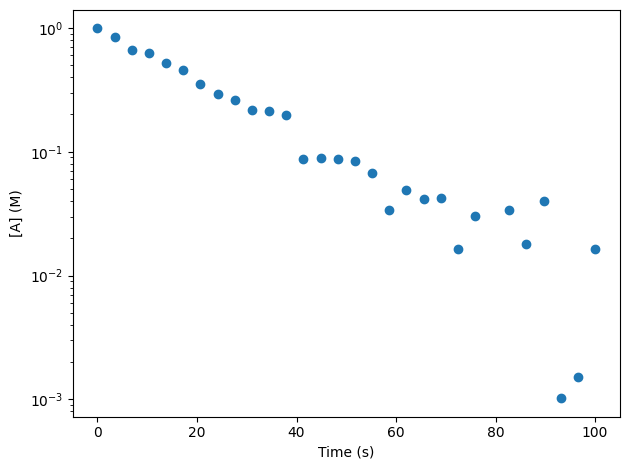

In [5]:
A0_true, k_true = 1.0, 0.05
t = np.linspace(0, 100, 30)
A_true = first_order(t, A0_true, k_true)
A = A_true + np.random.normal(0, 0.02, len(t))

plt.semilogy(t, A, 'o')
plt.xlabel('Time (s)')
plt.ylabel('[A] (M)')
plt.tight_layout()
plt.tight_layout()
plt.show()


## Fit Model

In [6]:
popt, pcov = curve_fit(first_order, t, A, p0=[0.9, 0.04])
A0_fit, k_fit = popt
t_half = np.log(2) / k_fit

print(f'k: {k_fit:.4f} s⁻¹')
print(f'Half-life: {t_half:.1f} s')

INFO:nlsq.curve_fit:Starting curve fit n_params=2 | n_data_points=30 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=2 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=2 | n_residuals=30 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=0.02155390590615613 | grad_norm=3.7850 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=0.005590461609373131 | grad_norm=0.2287 | step=0.9008884503644167 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=0.005516912035984496 | grad_norm=0.0018 | step=0.9008884503644167 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=3 | cost=0.005516906815758067 | grad_norm=2.9086e-05 | step=0.9008884503644167 | nfev=4


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.555417s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=4 | final_cost=0.0055 | elapsed=1.555s | final_gradient_norm=4.3310e-07


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=2.198289s


INFO:nlsq.curve_fit:Curve fit completed total_time=2.1983 | final_cost=0.0110 | covariance_warning=False


k: 0.0485 s⁻¹
Half-life: 14.3 s


## Key Insights1. **Linear on ln[A] vs t** indicates first-order2. **Half-life constant** for first-order---